In [1]:
import pandas as pd

# Load the second dataset
df_goals_and_assists = pd.read_excel('Goals & Assists.xlsx')
    
# Print the first 5 rows to check
print("Successfully loaded Goals & Assist dataset:")
print(df_goals_and_assists.head())

unwanted_cols = ['Unnamed: 0', 'Player', 'Nation', 'Goals + Assists', 'Non-Penalty Goals','Penalty Goals Made', 'Penalty Attempts','Yellow Cards', 'Red Cards', 'xG', 'npxG', 'xAG', 'npxG + xAG', 'Progressive Carries','Progressive Passes','Progressive Recieves','Goals + Assists Per 90','Non-Penalty Goals + Assists Per 90','xG + xAG Per 90','npxG + xAG Per 90']
df_goals_and_assists_cleaned = df_goals_and_assists.drop(columns=unwanted_cols, errors='ignore') # Note: I changed df_goals_cleaned to df_match_cleaned

print("\nThis is the NEW, CLEANED dataframe:")
print(df_goals_and_assists_cleaned.head())

Successfully loaded Goals & Assist dataset:
   Unnamed: 0               Player Nation Position  Age  Matches Played  \
0           0        Mohamed Salah    EGY       AT   32              38   
1           1      Virgil van Dijk    NED       DF   33              37   
2           2     Ryan Gravenberch    NED       MT   22              37   
3           3  Alexis Mac Allister    ARG       MT   25              35   
4           4      Ibrahima Konaté    FRA       DF   25              31   

   Starts  Minutes  90s Played  Goals  ...  Goals Per 90  Assists Per 90  \
0      38     3371        37.5     29  ...          0.77            0.48   
1      37     3330        37.0      3  ...          0.08            0.03   
2      37     3160        35.1      0  ...          0.00            0.11   
3      30     2599        28.9      5  ...          0.17            0.17   
4      30     2560        28.4      1  ...          0.04            0.07   

   Goals + Assists Per 90  Non-Penalty Goals Per

In [2]:
df_goals_and_assists_cleaned.to_excel('cleaned_goals_data.xlsx', index=False)

In [3]:
print(df_goals_and_assists_cleaned.isnull().sum())

Position                    0
Age                         0
Matches Played              0
Starts                      0
Minutes                     0
90s Played                  0
Goals                       0
Assists                     0
Progressive Receives        0
Goals Per 90                0
Assists Per 90              0
Non-Penalty Goals Per 90    0
xG Per 90                   0
xAG Per 90                  0
npxG Per 90                 0
dtype: int64


In [4]:
goals_dupes = df_goals_and_assists_cleaned.duplicated().sum()
print(f"Goals and Assists Data has: {goals_dupes} duplicate rows")

Goals and Assists Data has: 211 duplicate rows


In [5]:
print("\nDropping duplicates...")
df_goals_and_assists_cleaned = df_goals_and_assists_cleaned.drop_duplicates()
print(f"Goals data new duplicate count: {df_goals_and_assists_cleaned.duplicated().sum()}")


Dropping duplicates...
Goals data new duplicate count: 0


In [6]:
print("--- Goals and Assists Data (Outlier Check) ---")
print(df_goals_and_assists_cleaned.describe())

--- Goals and Assists Data (Outlier Check) ---
               Age  Matches Played       Starts      Minutes   90s Played  \
count  2063.000000     2063.000000  2063.000000  2063.000000  2063.000000   
mean     25.168686       19.007756    14.040717  1254.158022    13.934270   
std       4.486930       11.616860    11.514183   987.295650    10.970655   
min      15.000000        1.000000     0.000000     1.000000     0.000000   
25%      22.000000        9.000000     3.000000   342.500000     3.800000   
50%      25.000000       19.000000    12.000000  1083.000000    12.000000   
75%      28.000000       30.000000    24.000000  2107.500000    23.400000   
max      41.000000       38.000000    38.000000  3420.000000    38.000000   

             Goals      Assists  Progressive Receives  Goals Per 90  \
count  2063.000000  2063.000000           2063.000000   2063.000000   
mean      1.478429     1.035385             37.487155      0.095293   
std       2.956424     1.777434             53

Plotting boxplots for all 14 numeric columns in df_goals:



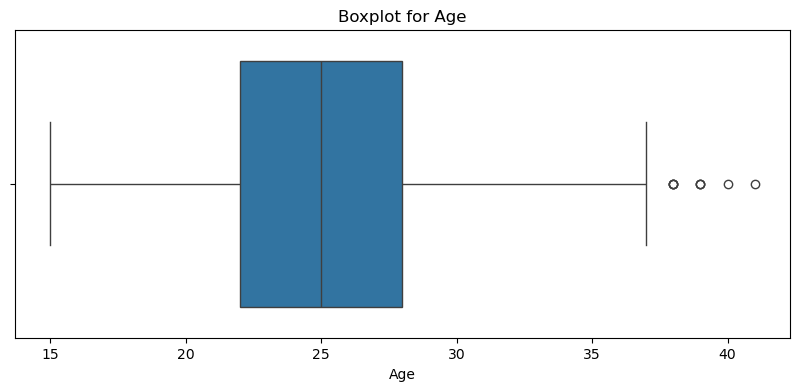

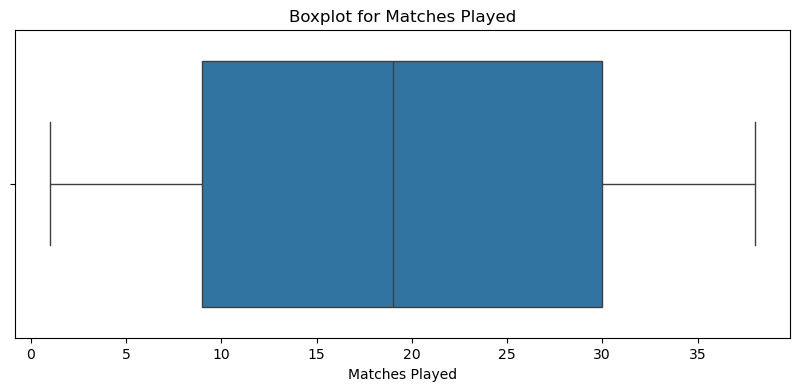

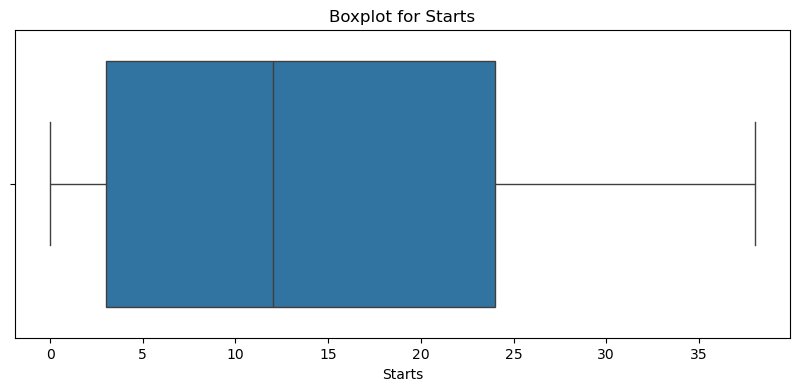

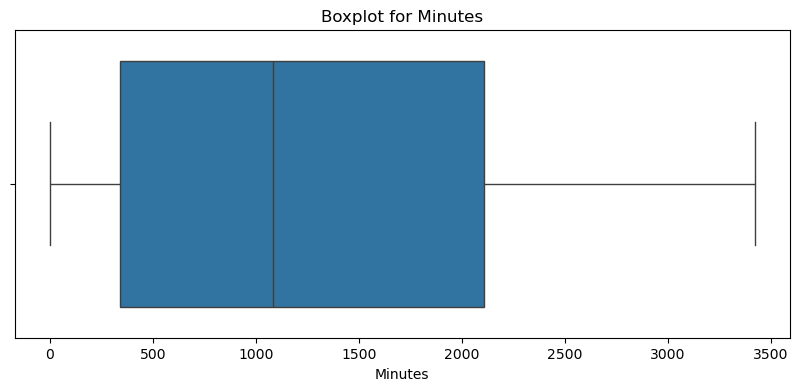

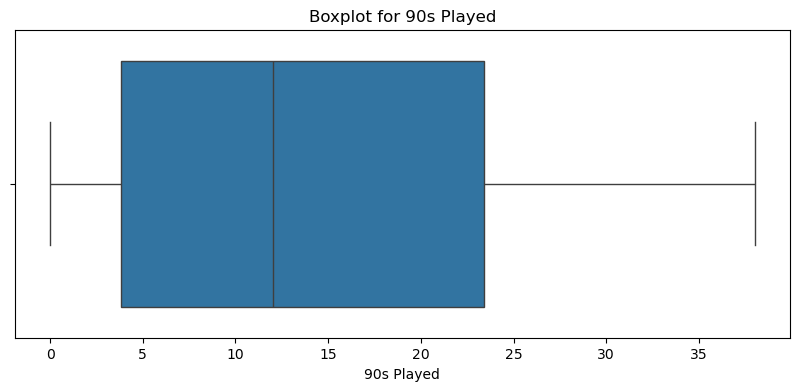

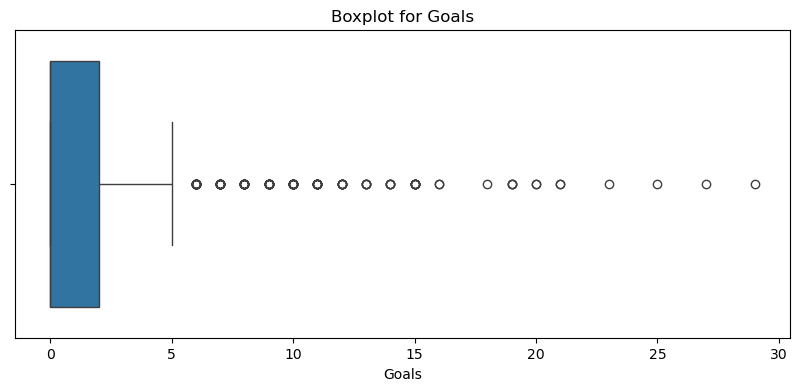

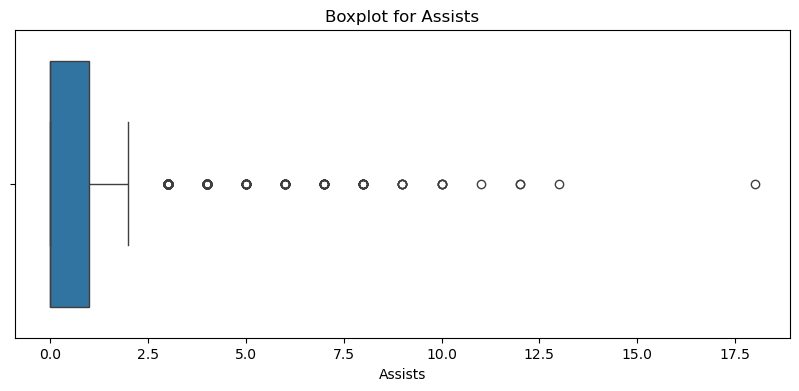

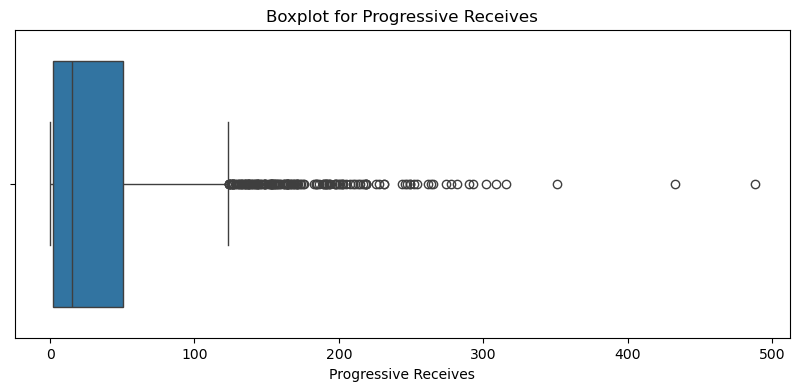

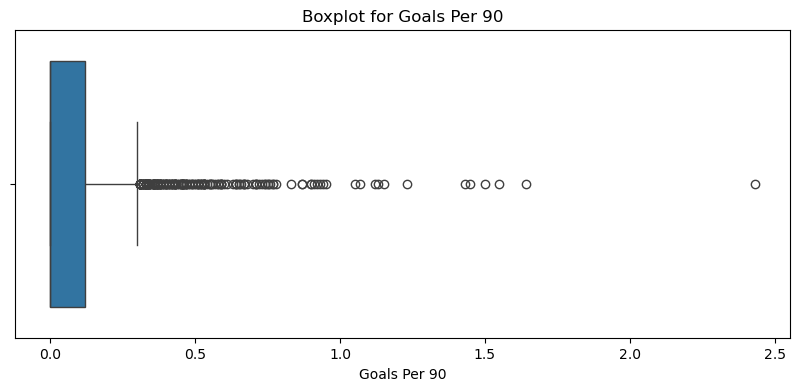

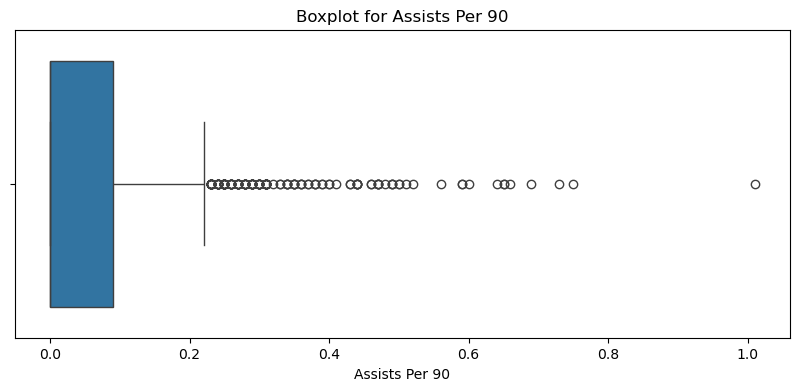

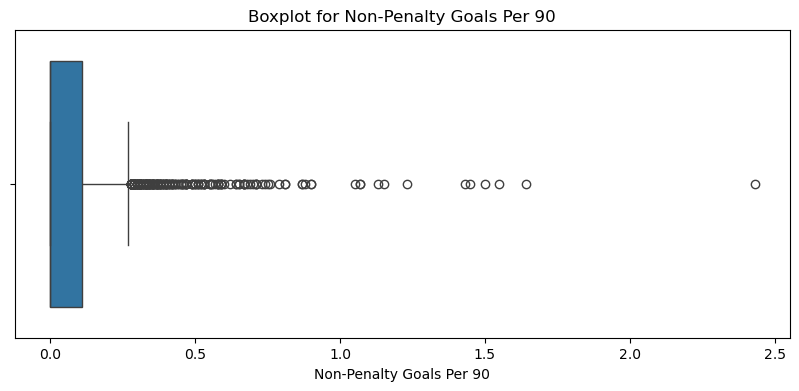

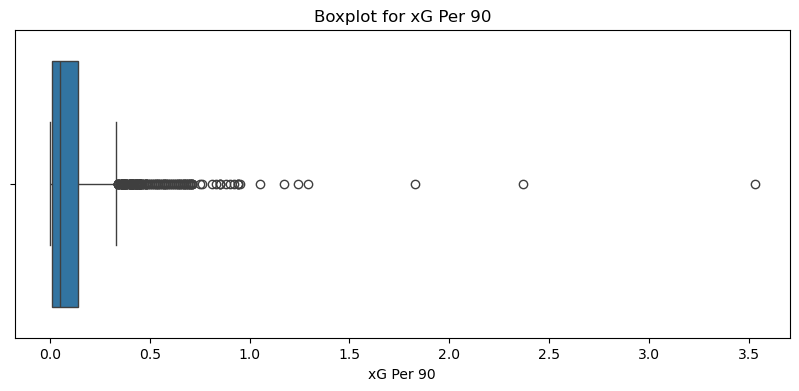

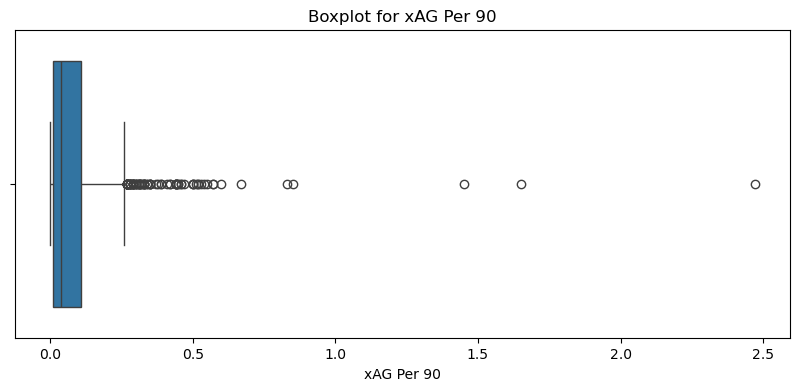

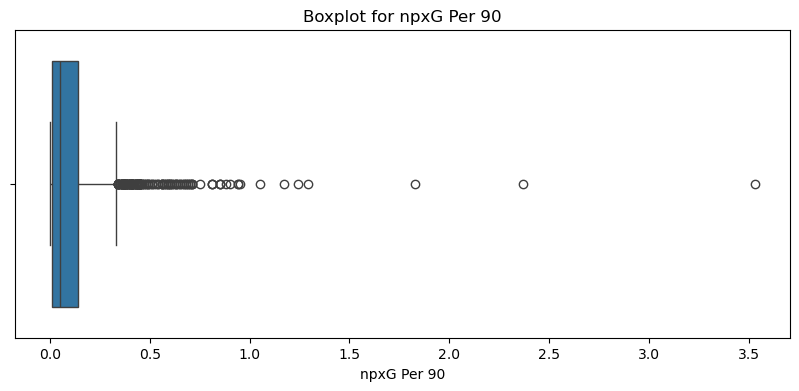


--- All numeric columns have been plotted. ---


In [16]:
import numpy as np
import matplotlib.pyplot as plt  # <-- ADD THIS LINE
import seaborn as sns            # <-- ADD THIS LINE

# Get a list of all columns that are numbers (int64 or float64)
numeric_cols = df_goals_and_assists_cleaned.select_dtypes(include=[np.number]).columns

print(f"Plotting boxplots for all {len(numeric_cols)} numeric columns in df_goals:\n")

# Loop through each numeric column
for col in numeric_cols:
    plt.figure(figsize=(10, 4)) # Create a new figure for each plot
    sns.boxplot(x=df_goals_and_assists_cleaned[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()

print("\n--- All numeric columns have been plotted. ---")

In [17]:
import pandas as pd
import numpy as np

def remove_outliers_iqr_targeted(df, columns_to_check):
    """
    Removes outliers from a DataFrame based on the IQR rule,
    but only for the columns specified in columns_to_check.
    A row is kept ONLY if it is within the IQR bounds for ALL specified columns.
    """
    df_original = df.copy()
    df_filtered = df.copy()
    
    print(f"Original shape: {df_original.shape}")
    
    for col in columns_to_check:
        print(f"...Applying IQR trimming for '{col}'")
        Q1 = df_filtered[col].quantile(0.25)
        Q3 = df_filtered[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        
        # Keep rows that are WITHIN the bounds for this column
        df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & 
                                  (df_filtered[col] <= upper_bound)]
    
    print(f"\nNew shape after trimming: {df_filtered.shape}")
    print(f"Total rows removed: {df_original.shape[0] - df_filtered.shape[0]}")
    return df_filtered

# --- Main script ---
print("--- Processing Goals and Assists Data ---")

try:
    # This script assumes 'df_goals_and_assists_cleaned' exists in your
    # notebook's memory from the cell you ran just before this one.
    
    # 3. Define columns to trim
    cols_to_trim_goals = [
        'Progressive Receives', 
        'Goals Per 90', 
        'Assists Per 90', 
        'Non-Penalty Goals Per 90', 
        'xG Per 90', 
        'xAG Per 90', 
        'npxG Per 90'
    ]
    
    # 4. Apply the targeted outlier removal
    # THIS CREATES THE VARIABLE YOUR NEXT CELL IS MISSING:
    df_goals_trimmed = remove_outliers_iqr_targeted(df_goals_and_assists_cleaned, cols_to_trim_goals)
    
    # 5. Save to Excel
    goals_excel_filename = "goals_data_trimmed_outliers.xlsx"
    df_goals_trimmed.to_excel(goals_excel_filename, index=False)
    
    print(f"\nSuccessfully created 'df_goals_trimmed' and saved to: {goals_excel_filename}")

except NameError:
    print("Error: 'df_goals_and_assists_cleaned' not found in memory.")
    print("Please make sure you have run the previous cells in your notebook")
    print("that load and clean 'Goals & Assists.xlsx' first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Processing Goals and Assists Data ---
Original shape: (2063, 15)
...Applying IQR trimming for 'Progressive Receives'
...Applying IQR trimming for 'Goals Per 90'
...Applying IQR trimming for 'Assists Per 90'
...Applying IQR trimming for 'Non-Penalty Goals Per 90'
...Applying IQR trimming for 'xG Per 90'
...Applying IQR trimming for 'xAG Per 90'
...Applying IQR trimming for 'npxG Per 90'

New shape after trimming: (1204, 15)
Total rows removed: 859

Successfully created 'df_goals_trimmed' and saved to: goals_data_trimmed_outliers.xlsx


In [18]:
import pandas as pd
import numpy as np

# --- Main script ---
print("--- Categorical Analysis for Trimmed Goals Data ---")

# We assume df_goals_trimmed is already in memory from running process_goals_data.py
# If not, you must load the Excel file first:

# --- FIX: Uncomment the line below ---
df_goals_trimmed = pd.read_excel("goals_data_trimmed_outliers.xlsx")
print("Loaded 'goals_data_trimmed_outliers.xlsx' from file.")

try:
    # 1. Analyze 'Position'
    print("Unique 'Position' values and their counts (from trimmed data):")
    print(df_goals_trimmed['Position'].value_counts())
    print("\n")
    
    print("--- Goals categorical analysis complete ---")

except NameError:
    # This error message will no longer appear, but it's good practice to leave it
    print("Error: 'df_goals_trimmed' not found.")
    print("Please run the 'process_goals_data.py' script in a cell above this one first,")
    print("or load the 'goals_data_trimmed_outliers.xlsx' file.")
except FileNotFoundError:
    print("Error: 'goals_data_trimmed_outliers.xlsx' not found.")
    print("Please make sure you have successfully run 'process_goals_data.py' first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Categorical Analysis for Trimmed Goals Data ---
Loaded 'goals_data_trimmed_outliers.xlsx' from file.
Unique 'Position' values and their counts (from trimmed data):
Position
DF       601
MT       307
GB       178
AT        51
MT,AT     37
MT,DF     30
Name: count, dtype: int64


--- Goals categorical analysis complete ---


--- Goals Data: Relationship Analysis ---
Loaded 'goals_data_trimmed_outliers.xlsx': (1204, 15)

--- Correlation Matrix (Trimmed Goals Data) ---


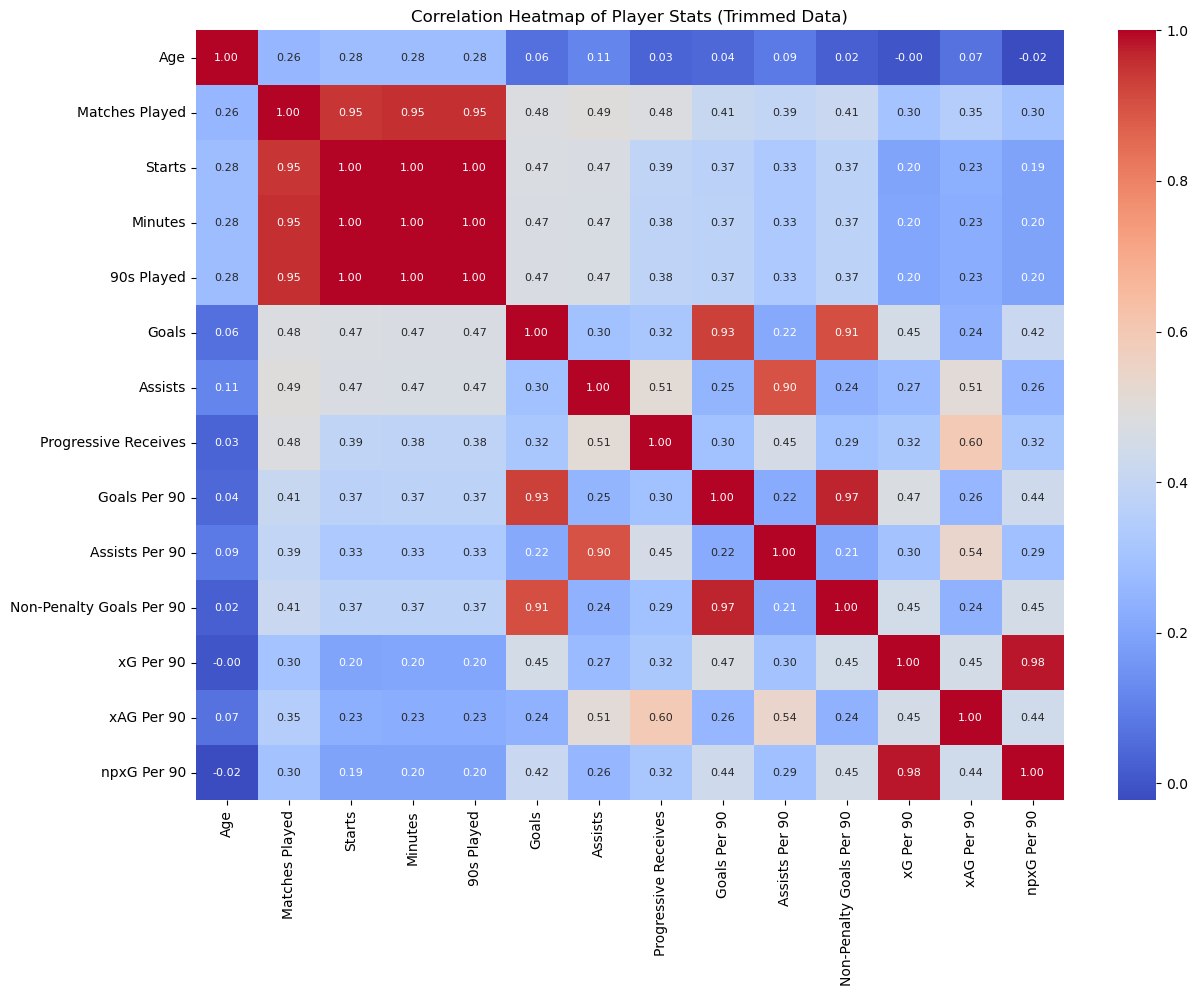


--- Average Stats by Position (from Trimmed Data) ---
             Goals   Assists  Progressive Receives  Goals Per 90
Position                                                        
DF        0.399334  0.449251             19.098170      0.017038
MT        0.390879  0.625407             20.153094      0.018078
MT,DF     0.333333  0.600000             26.166667      0.016000
MT,AT     0.189189  0.297297             27.702703      0.011351
AT        0.000000  0.000000              4.725490      0.000000
GB        0.000000  0.061798              0.005618      0.000000

--- Goals relationship analysis complete ---


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Main script ---
print("--- Goals Data: Relationship Analysis ---")

try:
    # 1. Load the data you just analyzed
    df_goals_trimmed = pd.read_excel("goals_data_trimmed_outliers.xlsx")
    print(f"Loaded 'goals_data_trimmed_outliers.xlsx': {df_goals_trimmed.shape}")

    # 2. Correlation Matrix
    print("\n--- Correlation Matrix (Trimmed Goals Data) ---")
    
    # Select only numeric columns for correlation
    numeric_cols = df_goals_trimmed.select_dtypes(include=[np.number])
    corr_matrix = numeric_cols.corr()
    
    # Create a heatmap to visualize the correlation
    plt.figure(figsize=(14, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                annot_kws={"size": 8})
    plt.title('Correlation Heatmap of Player Stats (Trimmed Data)')
    plt.show()

    # 3. Categorical vs. Numeric (Grouped Averages)
    print("\n--- Average Stats by Position (from Trimmed Data) ---")
    key_stats = ['Goals', 'Assists', 'Progressive Receives', 'Goals Per 90']
    
    # Group by 'Position' and calculate the mean for key stats
    position_stats = df_goals_trimmed.groupby('Position')[key_stats].mean()
    print(position_stats.sort_values(by='Goals', ascending=False))

    print("\n--- Goals relationship analysis complete ---")

except FileNotFoundError:
    print("Error: 'goals_data_trimmed_outliers.xlsx' not found.")
    print("Please make sure you have successfully run 'process_goals_data.py' first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [20]:
df_goals_trimmed.to_excel('goals_data_trimmed_outliers.xlsx', index=False)

--- Building Regression Model for 'Goals' ---
Loaded 'goals_data_trimmed_outliers.xlsx': (1204, 15)
Training data shape: (963, 14)
Testing data shape: (241, 14)

Training RandomForestRegressor model...
Model training complete.

--- Model Evaluation ---
Mean Absolute Error (MAE): 0.24
R-squared (R²): 0.44 (A score of 1.0 is perfect)

This model is, on average, off by 0.24 goals when making a prediction.

--- Top 10 Most Important Features ---
                 Feature  Importance
3                Minutes    0.277393
6              xG Per 90    0.251394
1         Matches Played    0.129275
5   Progressive Receives    0.078938
2                 Starts    0.060028
0                    Age    0.057120
8            npxG Per 90    0.053954
7             xAG Per 90    0.051371
4                Assists    0.028008
11           Position_MT    0.004616

Plotting actual vs. predicted values...


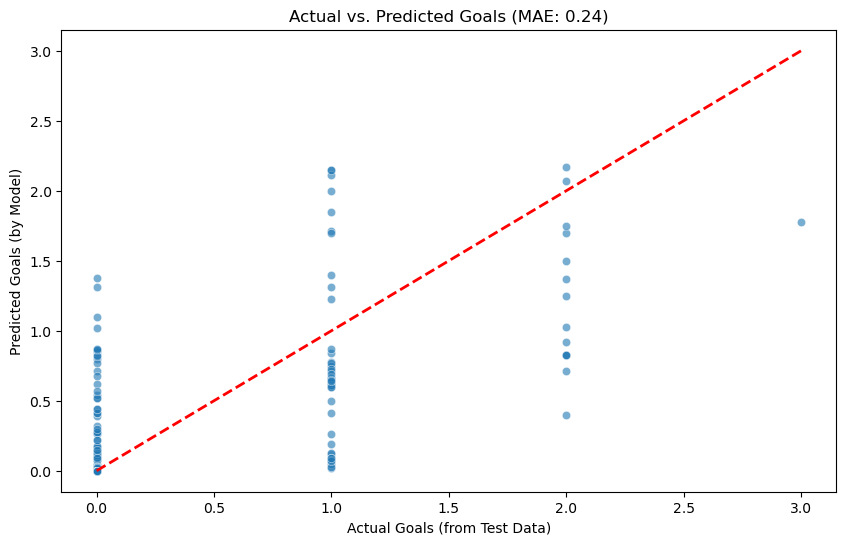

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# --- Main script ---
print("--- Building Regression Model for 'Goals' ---")

try:
    # 1. Load the trimmed data
    df = pd.read_excel("goals_data_trimmed_outliers.xlsx")
    print(f"Loaded 'goals_data_trimmed_outliers.xlsx': {df.shape}")

    # 2. Feature Engineering: Convert 'Position' to numbers
    # We use one-hot encoding to create new columns for each position
    df_processed = pd.get_dummies(df, columns=['Position'], drop_first=True)

    # 3. Define Features (X) and Target (y)
    target = 'Goals'
    
    # We select features that would be good predictors.
    # 'xG Per 90' (Expected Goals) is a very strong predictor.
    # We AVOID 'Goals Per 90' as it's a "leaky" feature (it's calculated *from* Goals)
    features_to_use = [
        'Age', 
        'Matches Played', 
        'Starts', 
        'Minutes', 
        'Assists', 
        'Progressive Receives', 
        'xG Per 90', 
        'xAG Per 90', 
        'npxG Per 90'
    ]
    
    # Get all the new 'Position_' columns we just created
    position_dummies = [col for col in df_processed.columns if col.startswith('Position_')]
    
    # Combine our base features with the new position columns
    final_features = features_to_use + position_dummies
    
    X = df_processed[final_features]
    y = df_processed[target]

    # 4. Train-Test Split
    # We'll test the model on 20% of the data it's never seen before.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")

    # 5. Train the Model
    print("\nTraining RandomForestRegressor model...")
    # n_estimators=100 means it uses 100 "decision trees"
    # random_state=42 ensures you get the same results every time you run it
    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    print("Model training complete.")

    # 6. Make Predictions on the Test Set
    y_pred = model.predict(X_test)
    
    # 7. Evaluate the Model (as per your PDF)
    print("\n--- Model Evaluation ---")
    
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    
    # R-squared (R²) - "Percentage of variance explained"
    r2 = r2_score(y_test, y_pred)
    print(f"R-squared (R²): {r2:.2f} (A score of 1.0 is perfect)")
    
    print(f"\nThis model is, on average, off by {mae:.2f} goals when making a prediction.")

    # 8. Feature Importance (The "Why")
    print("\n--- Top 10 Most Important Features ---")
    # See which features the model used most to make decisions
    importances = model.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    print(importance_df.head(10))

    # 9. Visual Evaluation: Actual vs. Predicted
    print("\nPlotting actual vs. predicted values...")
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    # This red line is the "perfect prediction" line
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Actual Goals (from Test Data)")
    plt.ylabel("Predicted Goals (by Model)")
    plt.title(f"Actual vs. Predicted Goals (MAE: {mae:.2f})")
    plt.show()

except FileNotFoundError:
    print("Error: 'goals_data_trimmed_outliers.xlsx' not found.")
    print("Please make sure you have successfully run 'process_goals_data.py' first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Building Regression Model for 'Assists' ---
Loaded 'goals_data_trimmed_outliers.xlsx': (1204, 15)
Training data shape: (963, 14)
Testing data shape: (241, 14)

Training RandomForestRegressor model...
Model training complete.

--- Model Evaluation ---
Mean Absolute Error (MAE): 0.30
R-squared (R²): 0.59 (A score of 1.0 is perfect)

This model is, on average, off by 0.30 assists when making a prediction.

--- Top 10 Most Important Features ---
                 Feature  Importance
7             xAG Per 90    0.236963
3                Minutes    0.234634
5   Progressive Receives    0.225120
1         Matches Played    0.097533
0                    Age    0.068533
2                 Starts    0.049885
8            npxG Per 90    0.026208
6              xG Per 90    0.023863
4                  Goals    0.017603
11           Position_MT    0.008577

Plotting actual vs. predicted values...


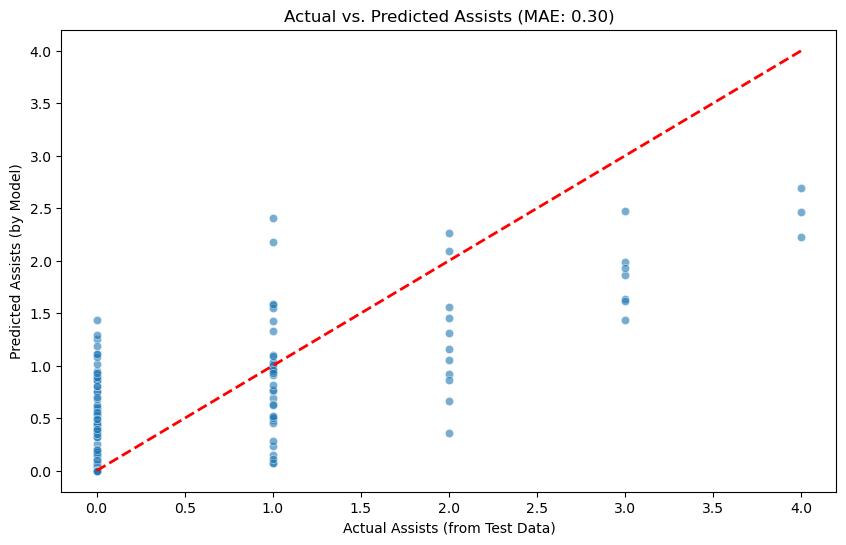

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# --- Main script ---
print("--- Building Regression Model for 'Assists' ---")

try:
    # 1. Load the trimmed data
    df = pd.read_excel("goals_data_trimmed_outliers.xlsx")
    print(f"Loaded 'goals_data_trimmed_outliers.xlsx': {df.shape}")

    # 2. Feature Engineering: Convert 'Position' to numbers
    df_processed = pd.get_dummies(df, columns=['Position'], drop_first=True)

    # 3. Define Features (X) and Target (y)
    target = 'Assists'  # <-- NEW TARGET
    
    # We select features that would be good predictors.
    # We AVOID 'Assists Per 90' as it's a "leaky" feature.
    features_to_use = [
        'Age', 
        'Matches Played', 
        'Starts', 
        'Minutes', 
        'Goals',  # <-- We can use 'Goals' to help predict 'Assists'
        'Progressive Receives', 
        'xG Per 90', 
        'xAG Per 90', # <-- 'xAG' should be very important here
        'npxG Per 90'
    ]
    
    # Get all the new 'Position_' columns
    position_dummies = [col for col in df_processed.columns if col.startswith('Position_')]
    
    # Combine our base features with the new position columns
    final_features = features_to_use + position_dummies
    
    X = df_processed[final_features]
    y = df_processed[target]

    # 4. Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")

    # 5. Train the Model
    print("\nTraining RandomForestRegressor model...")
    model_assists = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model_assists.fit(X_train, y_train)
    print("Model training complete.")

    # 6. Make Predictions on the Test Set
    y_pred = model_assists.predict(X_test)
    
    # 7. Evaluate the Model
    print("\n--- Model Evaluation ---")
    
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    
    # R-squared (R²)
    r2 = r2_score(y_test, y_pred)
    print(f"R-squared (R²): {r2:.2f} (A score of 1.0 is perfect)")
    
    print(f"\nThis model is, on average, off by {mae:.2f} assists when making a prediction.")

    # 8. Feature Importance (The "Why")
    print("\n--- Top 10 Most Important Features ---")
    importances = model_assists.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    print(importance_df.head(10))

    # 9. Visual Evaluation: Actual vs. Predicted
    print("\nPlotting actual vs. predicted values...")
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Actual Assists (from Test Data)")
    plt.ylabel("Predicted Assists (by Model)")
    plt.title(f"Actual vs. Predicted Assists (MAE: {mae:.2f})")
    plt.show()

except FileNotFoundError:
    print("Error: 'goals_data_trimmed_outliers.xlsx' not found.")
    print("Please make sure you have successfully run 'process_goals_data.py' first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Building Linear Regression Model for 'Goals' ---
Loaded 'goals_data_trimmed_outliers.xlsx': (1204, 15)
Training data shape: (963, 14)
Testing data shape: (241, 14)
Data has been scaled for the Linear Model.

Training LinearRegression model...
Model training complete.

--- Model Evaluation (Linear Regression) ---
Mean Absolute Error (MAE): 0.35
R-squared (R²): 0.35 (A score of 1.0 is perfect)
Mean Squared Error (MSE): 0.23
Root Mean Squared Error (RMSE): 0.47

This model is, on average, off by 0.35 goals when making a prediction.

--- Top 10 Most Important Features (Coefficients) ---
                 Feature  Coefficient  Absolute_Coefficient
6              xG Per 90     0.742264              0.742264
8            npxG Per 90    -0.514656              0.514656
3                Minutes     0.452494              0.452494
1         Matches Played    -0.258549              0.258549
10           Position_GB    -0.093844              0.093844
2                 Starts     0.068988         

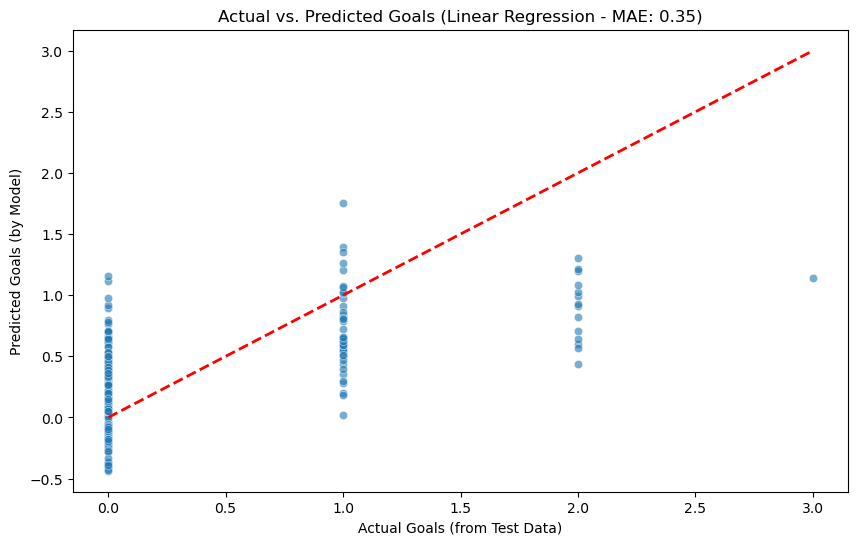

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error # <-- Added mean_squared_error

# --- Main script ---
print("--- Building Linear Regression Model for 'Goals' ---")

try:
    # 1. Load the trimmed data
    df = pd.read_excel("goals_data_trimmed_outliers.xlsx")
    print(f"Loaded 'goals_data_trimmed_outliers.xlsx': {df.shape}")

    # 2. Feature Engineering: Convert 'Position' to numbers
    df_processed = pd.get_dummies(df, columns=['Position'], drop_first=True)

    # 3. Define Features (X) and Target (y)
    target = 'Goals'
    # --- FIX: Removed the stray 'Entry' word that was causing the SyntaxError ---
    features_to_use = [
        'Age',
        'Matches Played', 
        'Starts', 
        'Minutes', 
        'Assists', 
        'Progressive Receives', 
        'xG Per 90', 
        'xAG Per 90', 
        'npxG Per 90'
    ]
    position_dummies = [col for col in df_processed.columns if col.startswith('Position_')]
    final_features = features_to_use + position_dummies
    
    X = df_processed[final_features]
    y = df_processed[target]

    # 4. Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")

    # 5. --- NEW STEP: Scale the Data ---
    # Linear models are sensitive to feature scales (e.g., 'Minutes' 0-3000 vs 'xG' 0-1).
    # We must scale them so they are all on a level playing field.
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("Data has been scaled for the Linear Model.")

    # 6. Train the Model
    print("\nTraining LinearRegression model...")
    model_linear = LinearRegression(n_jobs=-1)
    model_linear.fit(X_train_scaled, y_train)
    print("Model training complete.")

    # 7. Make Predictions on the Test Set
    y_pred = model_linear.predict(X_test_scaled)
    
    # 8. Evaluate the Model
    print("\n--- Model Evaluation (Linear Regression) ---")
    
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    
    r2 = r2_score(y_test, y_pred)
    print(f"R-squared (R²): {r2:.2f} (A score of 1.0 is perfect)")
    
    # --- NEW METRICS ---
    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    
    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    
    print(f"\nThis model is, on average, off by {mae:.2f} goals when making a prediction.")

    # 9. Feature Importance (The "Why" for Linear Models)
    # In Linear Regression, we look at the 'coefficients'
    print("\n--- Top 10 Most Important Features (Coefficients) ---")
    coefficients = model_linear.coef_
    
    # Use abs() to see the *magnitude* of the effect, regardless of positive or negative
    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Coefficient': coefficients
    })
    
    # Sort by the *absolute value* of the coefficient
    importance_df['Absolute_Coefficient'] = importance_df['Coefficient'].abs()
    print(importance_df.sort_values(by='Absolute_Coefficient', ascending=False).head(10))
    print("\n(Positive coefficient = more goals, Negative coefficient = fewer goals)")

    # 10. Visual Evaluation: Actual vs. Predicted
    print("\nPlotting actual vs. predicted values...")
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Actual Goals (from Test Data)")
    plt.ylabel("Predicted Goals (by Model)")
    plt.title(f"Actual vs. Predicted Goals (Linear Regression - MAE: {mae:.2f})")
    plt.show()

except FileNotFoundError:
    print("Error: 'goals_data_trimmed_outliers.xlsx' not found.")
    print("Please make sure you have successfully run 'process_goals_data.py' first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Building Linear Regression Model for 'Assists' ---
Loaded 'goals_data_trimmed_outliers.xlsx': (1204, 15)
Training data shape: (963, 14)
Testing data shape: (241, 14)
Data has been scaled for the Linear Model.

Training LinearRegression model...
Model training complete.

--- Model Evaluation (Linear Regression for Assists) ---
Mean Absolute Error (MAE): 0.41
R-squared (R²): 0.41 (A score of 1.0 is perfect)
Mean Squared Error (MSE): 0.39
Root Mean Squared Error (RMSE): 0.62

This model is, on average, off by 0.41 assists when making a prediction.

--- Top 10 Most Important Features (Coefficients) ---
                 Feature  Coefficient  Absolute_Coefficient
3                Minutes     0.826440              0.826440
1         Matches Played    -0.351689              0.351689
2                 Starts    -0.225233              0.225233
5   Progressive Receives     0.219574              0.219574
7             xAG Per 90     0.207819              0.207819
10           Position_GB    -0

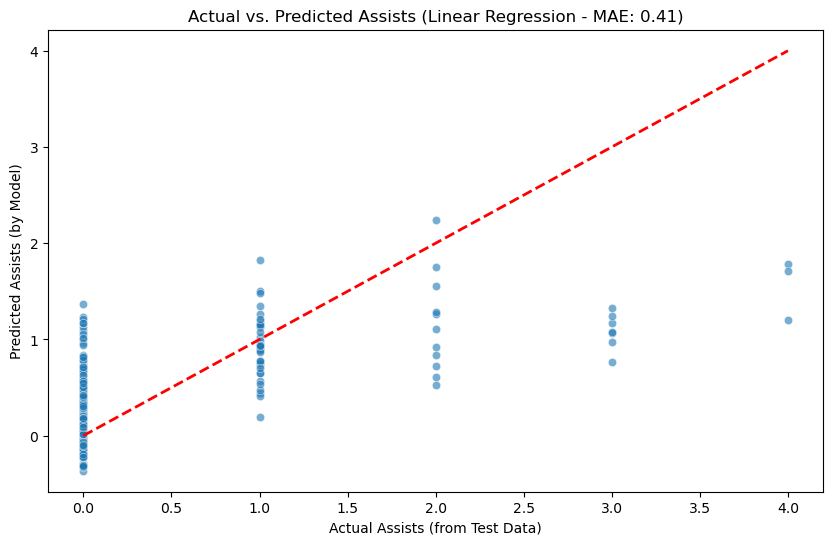

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error # <-- Added mean_squared_error

# --- Main script ---
print("--- Building Linear Regression Model for 'Assists' ---")

try:
    # 1. Load the trimmed data
    df = pd.read_excel("goals_data_trimmed_outliers.xlsx")
    print(f"Loaded 'goals_data_trimmed_outliers.xlsx': {df.shape}")

    # 2. Feature Engineering: Convert 'Position' to numbers
    df_processed = pd.get_dummies(df, columns=['Position'], drop_first=True)

    # 3. Define Features (X) and Target (y)
    target = 'Assists'  # <-- NEW TARGET
    
    # We select features that are good predictors for Assists
    features_to_use = [
        'Age', 
        'Matches Played', 
        'Starts', 
        'Minutes', 
        'Goals', 
        'Progressive Receives', 
        'xG Per 90', 
        'xAG Per 90', # <-- This should be very important
        'npxG Per 90'
    ]
    position_dummies = [col for col in df_processed.columns if col.startswith('Position_')]
    final_features = features_to_use + position_dummies
    
    X = df_processed[final_features]
    y = df_processed[target]

    # 4. Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")

    # 5. Scale the Data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("Data has been scaled for the Linear Model.")

    # 6. Train the Model
    print("\nTraining LinearRegression model...")
    model_linear_assists = LinearRegression(n_jobs=-1)
    model_linear_assists.fit(X_train_scaled, y_train)
    print("Model training complete.")

    # 7. Make Predictions on the Test Set
    y_pred = model_linear_assists.predict(X_test_scaled)
    
    # 8. Evaluate the Model
    print("\n--- Model Evaluation (Linear Regression for Assists) ---")
    
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    
    r2 = r2_score(y_test, y_pred)
    print(f"R-squared (R²): {r2:.2f} (A score of 1.0 is perfect)")
    
    # --- NEW METRICS ---
    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    
    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    
    print(f"\nThis model is, on average, off by {mae:.2f} assists when making a prediction.")

    # 9. Feature Importance (Coefficients)
    print("\n--- Top 10 Most Important Features (Coefficients) ---")
    coefficients = model_linear_assists.coef_
    
    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Coefficient': coefficients
    })
    
    importance_df['Absolute_Coefficient'] = importance_df['Coefficient'].abs()
    print(importance_df.sort_values(by='Absolute_Coefficient', ascending=False).head(10))
    print("\n(Positive coefficient = more assists, Negative coefficient = fewer assists)")

    # 10. Visual Evaluation: Actual vs. Predicted
    print("\nPlotting actual vs. predicted values...")
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Actual Assists (from Test Data)")
    plt.ylabel("Predicted Assists (by Model)")
    plt.title(f"Actual vs. Predicted Assists (Linear Regression - MAE: {mae:.2f})")
    plt.show()

except FileNotFoundError:
    print("Error: 'goals_data_trimmed_outliers.xlsx' not found.")
    print("Please make sure you have successfully run 'process_goals_data.py' first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")